## Prédiction via _machine learning_
* Utilisation de la librairie ``scikit-learn``
* Utilisation d'un MLP (Multi-Layer Perceptron) de régression

#### On importe les librairies nécessaires
* ``pandas`` pour lire les fichiers de données
* ``scikit-learn`` pour construire un réseau de neurones

In [4]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import r2_score, mean_squared_error

#### On importe les données depuis le fichier en utilisant ``pandas`` et la fonction ``read_csv``

In [86]:
training = pd.read_csv("Data_formation/dataset01_training.csv", delimiter=",")
prediction = pd.read_csv("Data_formation/prediction_sites.csv", delimiter=",")
training

x         y    values  Unnamed: 3
0      0.940139  0.571435  1.824916         NaN
1      0.668193  0.311208 -2.954026         NaN
2      0.541573  0.651896 -0.079557         NaN
3      0.674540  0.639750 -0.252586         NaN
4      0.614679  0.881346 -0.842599         NaN
...         ...       ...       ...         ...
89994  0.789227  0.006134 -0.118755         NaN
89995  0.803830  0.485206  0.048549         NaN
89996  0.462501  0.381216  0.876287         NaN
89997  0.212222  0.281102  0.469202         NaN
89998  0.682124  0.228809 -0.004114         NaN

[89999 rows x 4 columns]

On divise le tableau de données entre prédicteurs et prédiction

In [87]:
predictors = training.loc[:, ["x", "y"]]
prediction = training.loc[:, "values"]
predictors["y"]

0        0.571435
1        0.311208
2        0.651896
3        0.639750
4        0.881346
           ...   
89994    0.006134
89995    0.485206
89996    0.381216
89997    0.281102
89998    0.228809
Name: y, Length: 89999, dtype: float64

/home/benjamin/anaconda3/envs/for_cube/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/benjamin/anaconda3/envs/for_cube/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/benjamin/anaconda3/envs/for_cube/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/benjamin/anaconda3/envs/for_cube/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

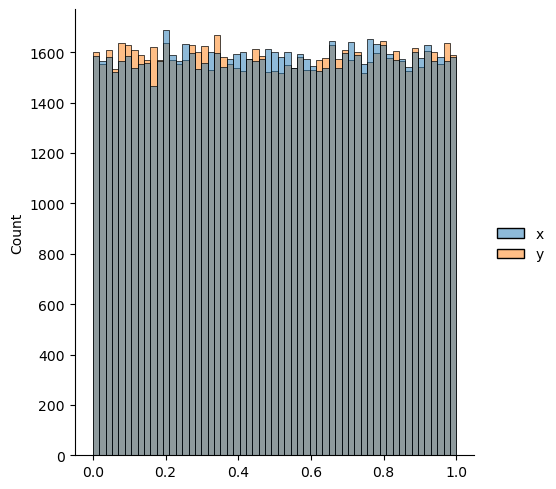

In [88]:
import seaborn as sea
sea.displot(predictors)

### Multilayer Perceptron (MLP) : Perceptron multi-couches
![image](Perceptron_4layers.png)

#### On crée un MLP regressor, qui va réaliser une régression classique
* ``hidden_layer_sizes`` : nbre de couches cachées et nbre de nodes dans chaque couche
* ``solver`` : _solver_ utilisé pour la convergence du modèle
* ``activation`` : fonction d'activation de chaque neurone
* ``early_stopping`` : si ``True``, on stoppe l'entraînement basé sur un indicateur (erreur, accuracy score, etc.) calculé sur un échantillon de validation
* ``validation_fraction`` : fraction de l'échantillon originel utilisée pour la validation
* ``max_iter`` : nbre maximum d'itérations
* ``verbose`` : si ``True``, on affiche les sorties de l'entraînement du modèle

In [8]:
regressor = MLPRegressor(hidden_layer_sizes=(40, 40, 40),
                         solver="adam",
                         activation="relu",
                         early_stopping=True,
                         validation_fraction=0.15,
                         max_iter=1000,
                         verbose=True)

#### Pipeline de régression

In [9]:
scaler= MaxAbsScaler()
pipeline_regression = make_pipeline(scaler, regressor)

#### Division des données en échantillons d'entraînement et de test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(predictors, 
                                                    prediction,
                                                    test_size=0.15)

#### Entraînement
* utilisation de la méthode ``fit``

In [11]:
pipeline_regression.fit(X_train, y_train)

Iteration 1, loss = 0.68831704
Validation score: 0.061155
Iteration 2, loss = 0.65916436
Validation score: 0.091988
Iteration 3, loss = 0.63763478
Validation score: 0.119779
Iteration 4, loss = 0.62392599
Validation score: 0.117636
Iteration 5, loss = 0.61291262
Validation score: 0.142310
Iteration 6, loss = 0.60540766
Validation score: 0.150265
Iteration 7, loss = 0.59633094
Validation score: 0.164142
Iteration 8, loss = 0.58915579
Validation score: 0.176456
Iteration 9, loss = 0.58052732
Validation score: 0.190389
Iteration 10, loss = 0.57355888
Validation score: 0.199998
Iteration 11, loss = 0.56725335
Validation score: 0.209785
Iteration 12, loss = 0.56104968
Validation score: 0.197312
Iteration 13, loss = 0.55445658
Validation score: 0.181234
Iteration 14, loss = 0.55015619
Validation score: 0.233961
Iteration 15, loss = 0.54356424
Validation score: 0.241200
Iteration 16, loss = 0.53907148
Validation score: 0.234876
Iteration 17, loss = 0.53513143
Validation score: 0.256611
Iterat

Pipeline(steps=[('maxabsscaler', MaxAbsScaler()),
                ('mlpregressor',
                 MLPRegressor(early_stopping=True,
                              hidden_layer_sizes=(40, 40, 40), max_iter=1000,
                              validation_fraction=0.15, verbose=True))])

#### On affiche le la RMSE et le R2 du modèle

In [12]:
mean_squared_error(pipeline_regression.predict(X_test), y_test)

0.5584480441678054

In [13]:
r2_score(pipeline_regression.predict(X_test), y_test)

0.3059074714563702

#### On stocke les résultats dans une dataframe

In [14]:
dict_of_results = dict(real_value=y_test,
                       prediction=pipeline_regression.predict(X_test))
results = pd.DataFrame(dict_of_results)
results

real_value  prediction
86518    0.643470    0.584078
25291   -0.765297   -0.858395
13784   -0.198921   -0.040037
66548   -0.007124    0.155352
38853    1.247236    0.919455
...           ...         ...
34028    0.044638    0.626959
60306    1.139653    1.180891
10635    1.245207    0.527184
26562    1.920902    1.905202
28445    1.755513    0.762609

[13500 rows x 2 columns]

#### Scatter plot des prédictions vs. valeurs réelles

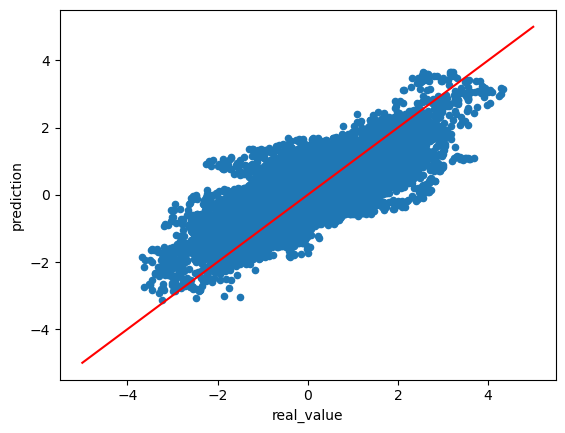

In [15]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
results.plot.scatter("real_value", "prediction", ax=ax)
ax.plot(np.linspace(-5,5), np.linspace(-5,5), color="red")

#### Utilisation ultérieure du modèle sur un nouveau jeu de données 

In [16]:
prediction_sites = pd.read_csv("Data_formation/prediction_sites.csv")
prediction_sites

x         y
0     0.764111  0.916625
1     0.316213  0.850340
2     0.443534  0.696895
3     0.840269  0.204761
4     0.320684  0.913298
...        ...       ...
9995  0.526162  0.036225
9996  0.522530  0.376776
9997  0.801633  0.714733
9998  0.181537  0.286519
9999  0.944198  0.845243

[10000 rows x 2 columns]

In [17]:
pipeline_regression.predict(prediction_sites)

array([-0.38584759, -0.35852113, -0.21512465, ..., -1.89005884,
       -0.57731338,  0.99370825])

---

## Test sur un modèle physique connu
* On construit un jeu de données à partir d'un modèle connu comme l'attraction gravitationnelle de deux corps
* Ce modèle physique est donné par l'équation suivante : $F_{12} = -G \frac{m_1m_2}{d^2}$

In [8]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
G = 6.6742
m_1 = 500 * np.random.rand(30000, 1) + 600
m_2 = 500 * np.random.rand(30000, 1) + 900
d = 40 * np.random.rand(30000, 1) + 50
F_12 = -G * m_1 * m_2 / d ** 2

In [15]:
regressor = MLPRegressor(hidden_layer_sizes=(50,50,50),
                         solver="adam",
                         activation="relu",
                         random_state=1,
                         max_iter=1000,
                         verbose=True)
scaler= MaxAbsScaler()
pipeline_regression = make_pipeline(scaler, regressor)

In [16]:
predictors = pd.DataFrame(data=np.concatenate([m_1, m_2, d], axis=1), columns=["m_1", "m_2", "d"])
predictors

m_1          m_2          d
0       694.907795   997.517540  86.269077
1       726.040559  1142.633057  69.340136
2       714.240087  1229.554300  83.663257
3      1033.561376  1071.245380  89.124398
4       707.318878  1361.369058  51.271807
...            ...          ...        ...
29995   790.786432  1078.190494  65.589755
29996   704.570267  1065.496519  71.909616
29997   728.102387  1132.047384  54.084171
29998   927.842702  1371.648042  77.821251
29999  1024.450582  1357.518014  58.900376

[30000 rows x 3 columns]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(predictors, 
                                                    F_12.ravel(),
                                                    test_size=0.15)

#### Training

In [18]:
pipeline_regression.fit(X_train, y_train)

Iteration 1, loss = 1192220.46107579
Iteration 2, loss = 490721.48521759
Iteration 3, loss = 180756.64464194
Iteration 4, loss = 175010.40595147
Iteration 5, loss = 166965.75389815
Iteration 6, loss = 156511.31117051
Iteration 7, loss = 144184.65727793
Iteration 8, loss = 128910.20375588
Iteration 9, loss = 109040.58410268
Iteration 10, loss = 83494.83923044
Iteration 11, loss = 53910.53075864
Iteration 12, loss = 27431.03157962
Iteration 13, loss = 12804.81590699
Iteration 14, loss = 7084.52435007
Iteration 15, loss = 4535.31128812
Iteration 16, loss = 3149.36851758
Iteration 17, loss = 2325.05976522
Iteration 18, loss = 1780.68180870
Iteration 19, loss = 1383.30201036
Iteration 20, loss = 1086.74684134
Iteration 21, loss = 882.03234544
Iteration 22, loss = 739.21313848
Iteration 23, loss = 628.27300589
Iteration 24, loss = 548.85195368
Iteration 25, loss = 489.99215487
Iteration 26, loss = 440.03469814
Iteration 27, loss = 400.56908049
Iteration 28, loss = 370.19664678
Iteration 29, 

Pipeline(steps=[('maxabsscaler', MaxAbsScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=(50, 50, 50), max_iter=1000,
                              random_state=1, verbose=True))])

In [19]:
dict_of_results = dict(real_value=y_test.ravel(),
                       prediction=pipeline_regression.predict(X_test))
results = pd.DataFrame(dict_of_results)
results

real_value   prediction
0     -978.432761  -976.807363
1    -1409.079026 -1410.234816
2    -1231.568071 -1235.268187
3    -2190.929244 -2198.036132
4    -1090.531417 -1089.873459
...           ...          ...
4495  -979.547575  -980.265885
4496 -1003.102532 -1003.675298
4497 -1145.691315 -1147.020192
4498  -671.172730  -669.893560
4499 -1786.672725 -1780.859017

[4500 rows x 2 columns]

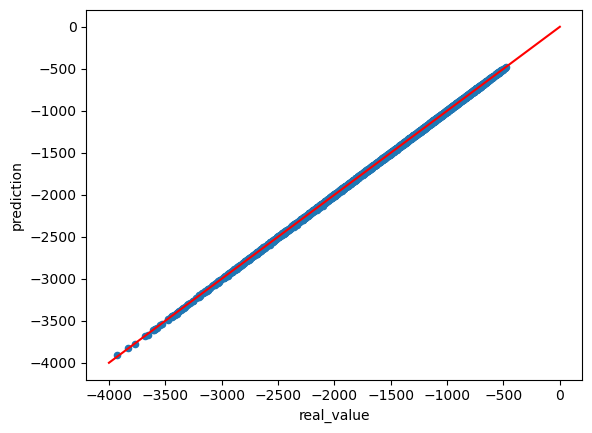

In [20]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
results.plot.scatter("real_value", "prediction", ax=ax)
ax.plot(np.linspace(-4000,0), np.linspace(-4000,0), color="red")